In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import interpolate
from itertools import groupby

In [2]:
delf=2
rf=range(60,92,delf)
ar=[]
for fr in rf:
    fname='Gain 5 elementos %i MHz (phi=0).csv'%fr
    dum=pd.read_csv(fname,names=['theta','gain'],skiprows=1)
    dum=dum[np.isfinite(dum.gain)]
    ar+=[list(dum.gain)]
ar=np.array(ar)

In [3]:
rt=list(dum.theta)

In [4]:
x,y=np.meshgrid(rt,rf)

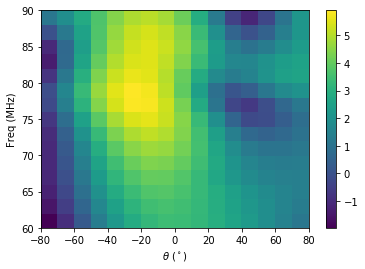

In [5]:
plt.pcolor(x,y,ar)
plt.colorbar()
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')

In [6]:
deriv=np.gradient(ar,delf) 

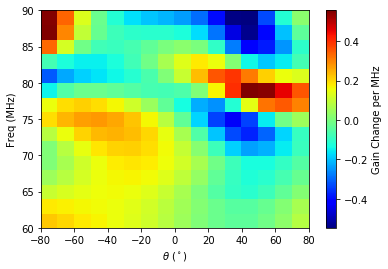

In [7]:
plt.pcolor(x,y,deriv[0],cmap='jet') #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')

In [8]:
delf=2
rf=range(60,92,delf)
ar90=[]
for fr in rf:
    fname='Gain 5 elementos %i MHz (phi=90).csv'%fr
    dum=pd.read_csv(fname,names=['theta','gain'],skiprows=1)
    dum=dum[np.isfinite(dum.gain)]
    ar90+=[list(dum.gain)]
ar90=np.array(ar90)
rt90=list(dum.theta)

In [9]:
dum.head() # el intervalo es de 1 grado!

,theta,gain
1,-89,1.872106
2,-88,1.888861
3,-87,1.916574
4,-86,1.954934
5,-85,2.003518


In [11]:
x90,y90=np.meshgrid(rt90,rf)

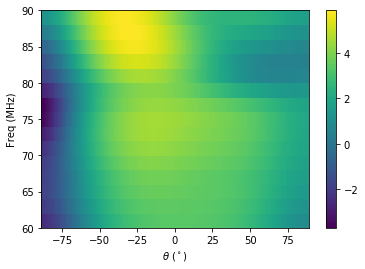

In [12]:
plt.pcolor(x90,y90,ar90)
plt.colorbar()
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')

In [13]:
deriv90=np.gradient(ar90,delf) 

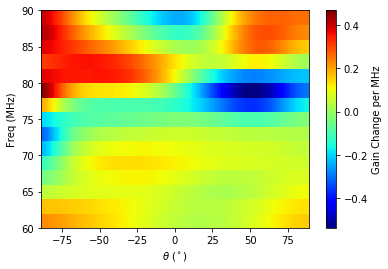

In [14]:
plt.pcolor(x90,y90,deriv90[0],cmap='jet') #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')

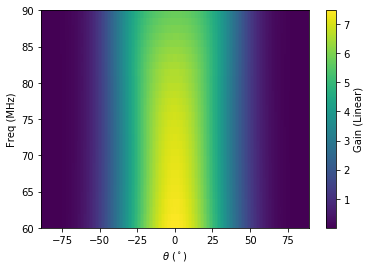

In [52]:
fold='c1'
ori=90 #deg
delf=1 # MHz
fmin=60 #MHz
fmax=91 #MHz
rf=range(fmin,fmax,delf)
ar=[]
for fr in rf:
    fname=fold+'/Gain %i MHz phi=%i.csv'%(fr,ori)
    dum=pd.read_csv(fname,names=['theta','gain'],skiprows=1)
    dum=dum[np.isfinite(dum.gain)]
    ar+=[list(dum.gain)]
ar=np.array(ar)
rt=list(dum.theta)
x,y=np.meshgrid(rt,rf)
plt.pcolor(x,y,ar)
plt.colorbar(label='Gain (Linear)')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('Dipologainphi0')

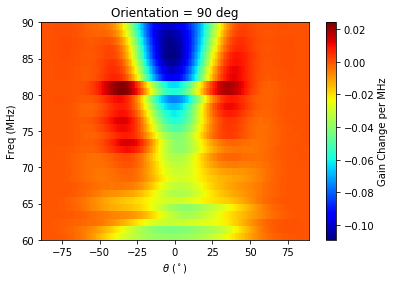

In [53]:
deriv=np.gradient(ar,delf) 
plt.pcolor(x,y,deriv[0],cmap='jet') #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
plt.title('Orientation = '+str(ori)+" deg")

In [54]:
bvsp90=interpolate.RectBivariateSpline(rf,rt,ar,s=1)
dx290este, dy290este = 0.2, 0.2
xprueba = np.arange(0, 89, dx290este) # este
yprueba = np.arange(fmin, fmax, dy290este)
Xprueba, Yprueba = np.meshgrid(xprueba,yprueba)
Zprueba = bvsp90(yprueba, xprueba)
derivbspl90prueba=np.gradient(Zprueba,dx290este)

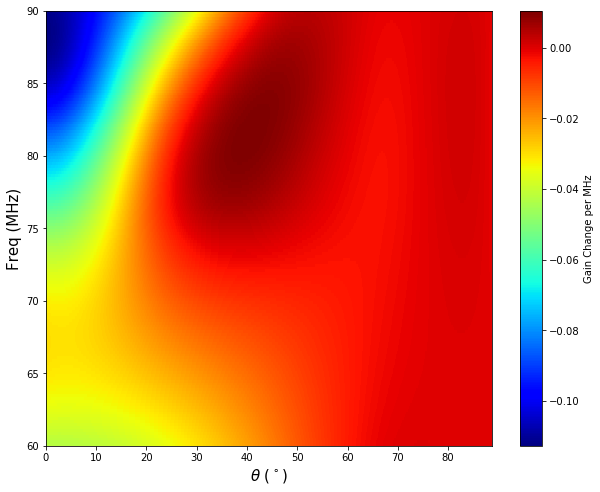

In [58]:
plt.figure(figsize=(10,8))
plt.pcolor(xprueba,yprueba,derivbspl90prueba[0],cmap='jet') #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.ylim(60,90)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Freq (MHz)',fontsize=15)
plt.xlabel(r'$\theta$ ($^\circ$)',fontsize=15)

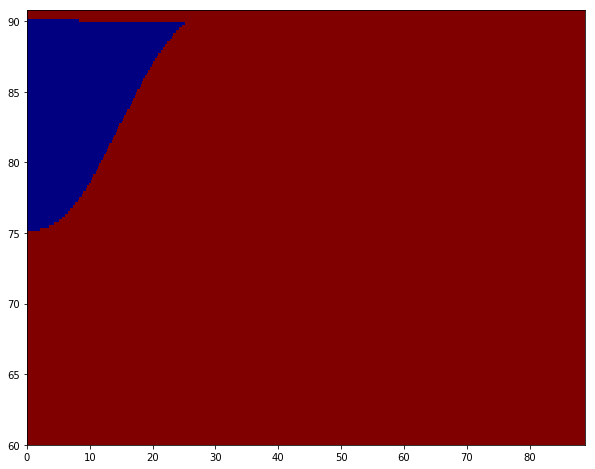

In [59]:
plt.figure(figsize=(10,8))
masked=np.abs(derivbspl90prueba[0])<0.05
plt.pcolor(xprueba,yprueba,masked,cmap='jet') #deriv[0] es a lo largo del eje de frecuencias

In [71]:
masked.shape

(155, 445)

In [72]:
(91-60)/0.2

155.0

In [169]:
xx = range(len(coll))
yy = coll
intervals=[]
for group in groupby(iter(xx), lambda x: yy[x]):
    ix=group[0]
    if ix==1:
        li=list(group[1])
        fini=yprueba[li[0]]
        intervals+=[(fini,yprueba[li[-1]]-fini)]

In [170]:
intervals

[(83.000000000000327, 4.6000000000000654)]

1 []
2 [(65.60000000000008, 7.600000000000108)]


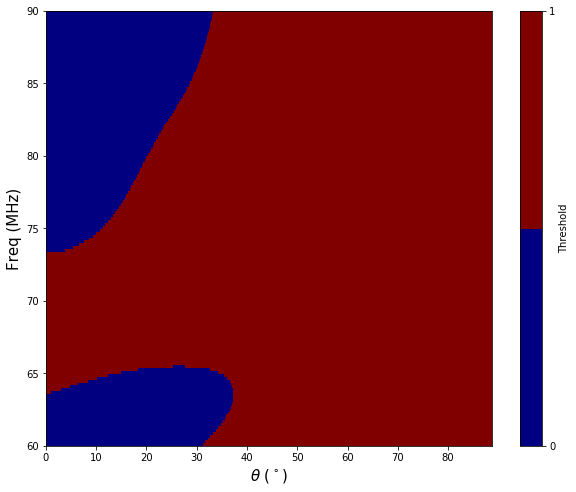

3 []
4 [(60.0, 1.8000000000000256), (69.200000000000131, 5.4000000000000767)]


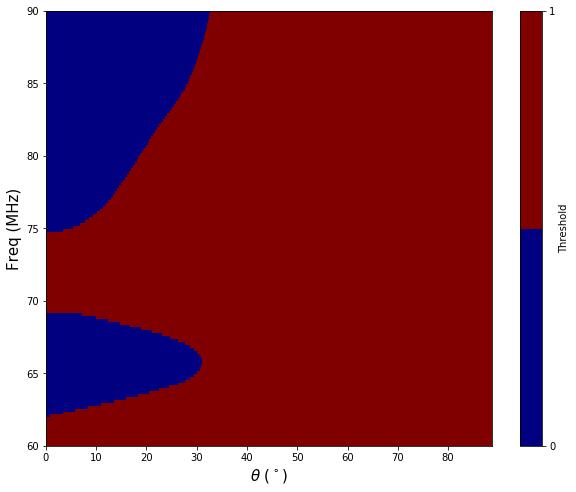

5 [(86.800000000000381, 1.0000000000000142)]


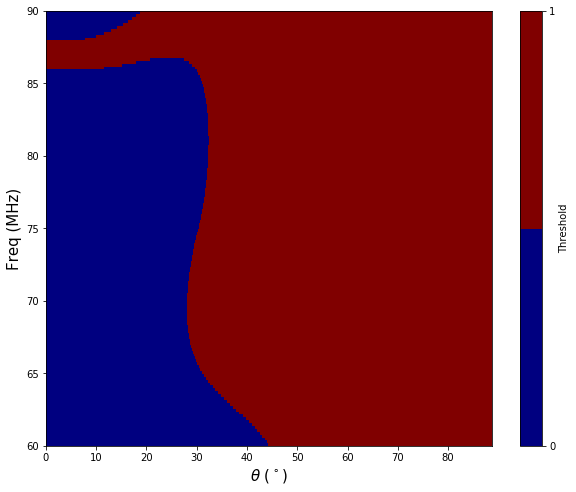

6 []
7 []
8 []
9 []
10 []


In [238]:
eval=[]
farr=[]
threshold=0.02
for i in range(1,11):
    fold='c'+str(i)
    ori=90 #deg
    delf=1 # MHz
    fmin=60 #MHz
    fmax=91 #MHz
    rf=range(fmin,fmax,delf)
    ar=[]
    for fr in rf:
        fname=fold+'/Gain %i MHz phi=%i.csv'%(fr,ori)
        dum=pd.read_csv(fname,names=['theta','gain'],skiprows=1)
        dum=dum[np.isfinite(dum.gain)]
        ar+=[list(dum.gain)]
    ar=np.array(ar)
    rt=list(dum.theta)
    x,y=np.meshgrid(rt,rf)
    deriv=np.gradient(ar,delf) 
    bvsp90=interpolate.RectBivariateSpline(rf,rt,ar,s=1)
    dx290este, dy290este = 0.2, 0.2
    xprueba = np.arange(0, 89, dx290este) # este
    yprueba = np.arange(fmin, fmax, dy290este)
    Xprueba, Yprueba = np.meshgrid(xprueba,yprueba)
    Zprueba = bvsp90(yprueba, xprueba)
    derivbspl90prueba=np.gradient(Zprueba,dx290este)
    masked=np.abs(derivbspl90prueba[0])<threshold
    coll=np.prod(masked,axis=1)
    coll=coll[yprueba<90]
    xx = range(len(coll))
    yy = coll
    intervals=[]
    for group in groupby(iter(xx), lambda x: yy[x]):
        ix=group[0]
        if ix==1:
            li=list(group[1])
            fini=yprueba[li[0]]
            intervals+=[(fini,yprueba[li[-1]]-fini)]
    print(i,intervals)
    if len(intervals)>0:
        ffile=fold+'_intervals.txt'
        farr+=[ffile]
        np.savetxt(ffile,intervals) # (fini, deltaf) for each band
        plt.figure(figsize=(10,8))
        plt.pcolor(xprueba,yprueba,masked,cmap=plt.cm.get_cmap('jet', 2)) 
        plt.colorbar(ticks=range(2),label='Threshold')
        plt.ylim(60,90)
        plt.ylabel('Freq (MHz)',fontsize=15)
        plt.xlabel(r'$\theta$ ($^\circ$)',fontsize=15)
        plt.show()
        if len(intervals)>1:
            franges=[intervals[i][1] for i in range(len(intervals))]
        else:
            franges=intervals[0][1]
        eval+=[(i,len(intervals),np.max(franges),np.sum(franges))]

In [239]:
dat = pd.DataFrame(eval, columns=['Simulation Index','Number of bands','Max. bandwidth', 'Total bandwidth'])
dat['filenames']=farr

In [240]:
dat

,Simulation Index,Number of bands,Max. bandwidth,Total bandwidth,filenames
0,2,1,7.6,7.6,c2_intervals.txt
1,4,2,5.4,7.2,c4_intervals.txt
2,5,1,1.0,1.0,c5_intervals.txt
